<a href="https://colab.research.google.com/github/yangsoyoung10011001/HumanActivityRecognition/blob/main/MediaPipe_Pose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mediapipe opencv-python
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_dlrawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose



For static images

In [ ]:
import numpy as np

In [ ]:
from google.colab.patches import cv2_imshow

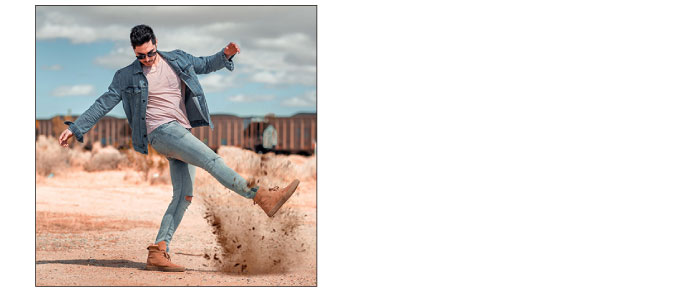

Nose coordinates: (146.3411527276039, 60.54613494873047)


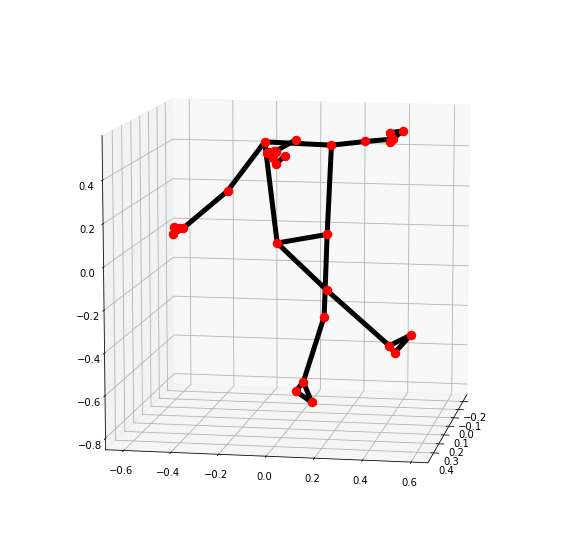

In [ ]:

fname = '/content/pose.jpg'
original = cv2.imread(fname, cv2.IMREAD_COLOR)
cv2_imshow(original)
IMAGE_FILES = [fname]
BG_COLOR = (192,192,192)
with mp_pose.Pose(
    static_image_mode=True, model_complexity=2, enable_segmentation=True,
    min_detection_confidence=0.5) as pose:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    
    #conver the BGR image to RGB before processing
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    image_height, image_width,_ = image.shape
    if not results.pose_landmarks:
      continue
    print(
        f'Nose coordinates: ('
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x*image_width}, '
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y*image_height})'

    )
    #이미지 주석달기

    annotated_image = image.copy()
    #Draw segmentation on the image. 이미지 분할
    #To improve segmentation around boundaries, consider applying a joint
    #bilateral filter to "results.segmentation_mask" with "image". 세그멘테이션 마스크 결과와 이미지 양방향 필터

    condition = np.stack((results.segmentation_mask,) * 3, axis=-1)>0.1
    bp_image = np.zeros(image.shape, dtype=np.uint8)
    bp_image[:] = BG_COLOR
    annotated_image = np.where(condition, annotated_image, bp_image)

    #Draw pose landmarks on the image.
    mp_drawing.draw_landmarks(annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS, landmark_drawing_spec=mp_dlrawing_styles.get_default_pose_landmarks_style())
    cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)

    #Plot pose world landmarks.
    mp_drawing.plot_landmarks(results.pose_world_landmarks,mp_pose.POSE_CONNECTIONS)


print


In [ ]:
# # For webcam input:
# cap = cv2.VideoCapture(0)
# with mp_pose.Pose(
#     min_detection_confidence=0.5,
#     min_tracking_confidence=0.5) as pose:
#   while cap.isOpened():
#     success, image = cap.read()
#     if not success:
#       print("Ignoring empty camera frame.")
#       # If loading a video, use 'break' instead of 'continue'.
#       continue

#     # To improve performance, optionally mark the image as not writeable to
#     # pass by reference.
#     image.flags.writeable = False
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     results = pose.process(image)

#     # Draw the pose annotation on the image.
#     image.flags.writeable = True
#     image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
#     mp_drawing.draw_landmarks(
#         image,
#         results.pose_landmarks,
#         mp_pose.POSE_CONNECTIONS,
#         landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
#     # Flip the image horizontally for a selfie-view display.
#     cv2.imshow('MediaPipe Pose', cv2.flip(image, 1))
#     if cv2.waitKey(5) & 0xFF == 27:
#       break
# cap.release()

In [ ]:
# uploaded = open("/content/thao-le-hoang-v4zceVZ5HK8-unsplash.jpg", "r")

In [ ]:
# from PIL import Image
# import numpy as np

# img_color = Image.open('/content/thao-le-hoang-v4zceVZ5HK8-unsplash.jpg')
# #img_gray = Image.open('C:/test.jpg').convert('L') #회색조로 변환 

# img_color=np.array(img_color) # PIL로 열때는 np.array 까먹지 말기 
# # img_gray=np.array(img_gray)

# plt.imshow(img_color)
# # plt.imshow(img_gray,'gray')
# plt.show()

In [ ]:
# print(img_color)

In [ ]:
# from google.colab import files
# uploaded = files.upload()